## Import library

In [ ]:
!pip install pycaret

In [ ]:
# For managing data
import pandas as pd
import numpy as np

# For importing data from Google Drive
from google.colab import drive


# For visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# For styling an visualisation
%matplotlib inline
sns.set_style()
mpl.rcParams["font.size"] = 14

# For data preprocessing for ML model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# For creating ML model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # SVM

# For training multiple ML algorithm and a comparison
from pycaret.classification import *

# For model evaluation
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

# Turn off warnings
import warnings
warnings.filterwarnings("ignore")

## Import dataset

Dataset: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [ ]:
drive.mount("/content/drive")
dataset_path = "/content/drive/MyDrive/My Note/dataset/credit_risk_dataset.csv"
df = pd.read_csv(dataset_path)

Mounted at /content/drive


In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Data Cleaning

### Removing duplicate

In [ ]:
print("Number of duplicate:", df.duplicated().sum())

df.drop_duplicates(inplace = True)

print("(Recheck) Number of duplicate:", df.duplicated().sum())

Number of duplicate: 165
(Recheck) Number of duplicate: 0


### Managing missing value

In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_status,0
loan_percent_income,0


In [ ]:
# Drop rows that contain missing value
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


### Datatype correction

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28501 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28501 non-null  int64  
 1   person_income               28501 non-null  int64  
 2   person_home_ownership       28501 non-null  object 
 3   person_emp_length           28501 non-null  float64
 4   loan_intent                 28501 non-null  object 
 5   loan_grade                  28501 non-null  object 
 6   loan_amnt                   28501 non-null  int64  
 7   loan_int_rate               28501 non-null  float64
 8   loan_status                 28501 non-null  int64  
 9   loan_percent_income         28501 non-null  float64
 10  cb_person_default_on_file   28501 non-null  object 
 11  cb_person_cred_hist_length  28501 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [ ]:
# Convert to int
column_to_convert_to_int = []
for n in column_to_convert_to_int:
  df[n] = df[n].astype("int")

# Convert to float
column_to_convert_to_float = []
for n in column_to_convert_to_float:
  df[n] = df[n].astype("float")

# Convert to category
column_to_convert_to_category = ["person_home_ownership", "loan_intent", "loan_grade", "loan_status", "cb_person_default_on_file"]
for n in column_to_convert_to_category:
  df[n] = df[n].astype("category")

In [ ]:
# Double checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28501 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  28501 non-null  int64   
 1   person_income               28501 non-null  int64   
 2   person_home_ownership       28501 non-null  category
 3   person_emp_length           28501 non-null  float64 
 4   loan_intent                 28501 non-null  category
 5   loan_grade                  28501 non-null  category
 6   loan_amnt                   28501 non-null  int64   
 7   loan_int_rate               28501 non-null  float64 
 8   loan_status                 28501 non-null  category
 9   loan_percent_income         28501 non-null  float64 
 10  cb_person_default_on_file   28501 non-null  category
 11  cb_person_cred_hist_length  28501 non-null  int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 1.9 MB


### Manging text data

In [ ]:
# Converting uppercase to lowercase
df["person_home_ownership"] = df["person_home_ownership"].str.lower()
df["loan_intent"] = df["loan_intent"].str.lower()
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,rent,123.0,personal,D,35000,16.02,1,0.59,Y,3
1,21,9600,own,5.0,education,B,1000,11.14,0,0.10,N,2
2,25,9600,mortgage,1.0,medical,C,5500,12.87,1,0.57,N,3
3,23,65500,rent,4.0,medical,C,35000,15.23,1,0.53,N,2
4,24,54400,rent,8.0,medical,C,35000,14.27,1,0.55,Y,4


### Detecting outlier

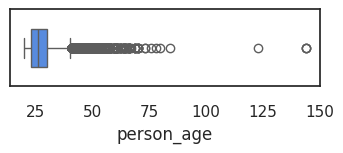

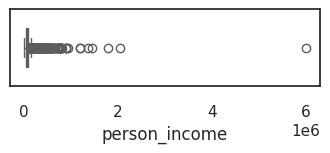

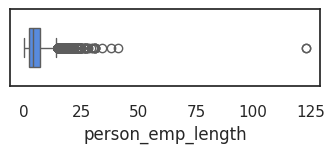

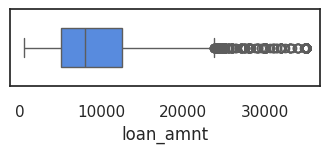

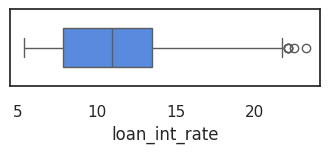

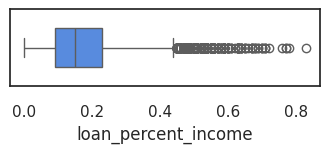

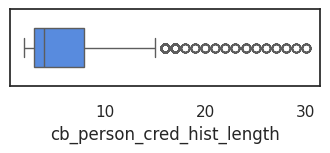

In [ ]:
numeric_feature = df.select_dtypes(include = np.number)
column_to_plot = numeric_feature.columns

sns.set_theme(style = "white")

# Ploting boxplot for all numeric featires
for n in column_to_plot:
  plt.figure(figsize = (4,1))
  ax = sns.boxplot(x = df[n],
                   width = 0.5,
                   color = "#4285f4",
                   native_scale = True
                  )

  # Rotating the label if it is too long
  # if len(str(int(df[n].max()))) > 6:
  #   ax.set_xticklabels(ax.get_xticklabels(),
  #                     rotation = 30)

  plt.show()

In [ ]:
numeric_column_name = df.select_dtypes(include = np.number).columns

print("Shape before removing outliers:", df.shape)
print("\n--------------------\n")

# Dropping outlier for all numeric features
for n in numeric_column_name:

  # Calculate the upper and lower limits
  Q1 = df[n].quantile(0.25)
  Q3 = df[n].quantile(0.75)

  IQR = Q3 - Q1

  lower = Q1 - (1.5 * IQR)
  upper = Q3 + (1.5 * IQR)

  print("Column name:" , n)
  print("The lower limit:", lower)
  print("The upper limit:", upper)
  print("Number of rows less than lower limit:", df[df[n] < lower].shape[0])
  print("Number of rows greater than upper limit:", df[df[n] > upper].shape[0])
  print("\n--------------------\n")

  # Removing outliers
  df = df[(df[n] > lower) & (df[n] < upper)]

  # df = df[df[n] > lower]
  # df = df[df[n] < upper]

print("Shape after removing outliers:", df.shape)

Shape before removing outliers: (28501, 12)

--------------------

Column name: person_age
The lower limit: 12.5
The upper limit: 40.5
Number of rows less than lower limit: 0
Number of rows greater than upper limit: 1296

--------------------

Column name: person_income
The lower limit: -22152.0
The upper limit: 140920.0
Number of rows less than lower limit: 0
Number of rows greater than upper limit: 1214

--------------------

Column name: person_emp_length
The lower limit: -5.5
The upper limit: 14.5
Number of rows less than lower limit: 0
Number of rows greater than upper limit: 563

--------------------

Column name: loan_amnt
The lower limit: -5500.0
The upper limit: 22500.0
Number of rows less than lower limit: 0
Number of rows greater than upper limit: 1106

--------------------

Column name: loan_int_rate
The lower limit: -0.3949999999999978
The upper limit: 21.724999999999998
Number of rows less than lower limit: 0
Number of rows greater than upper limit: 10

------------------

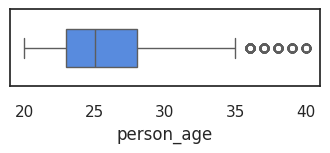

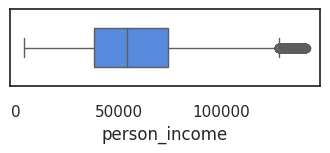

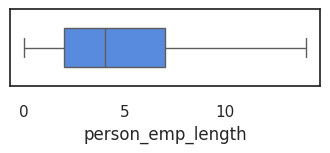

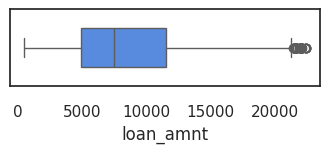

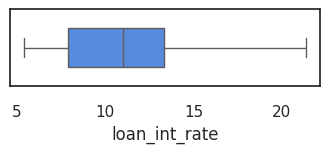

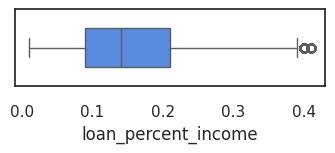

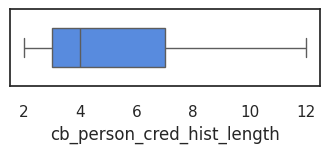

In [ ]:
numeric_feature = df.select_dtypes(include = np.number)
column_to_plot = numeric_feature.columns

sns.set_theme(style = "white")

# Ploting boxplot for all numeric features
for n in column_to_plot:
  plt.figure(figsize = (4,1))
  ax = sns.boxplot(x = df[n],
                   width = 0.5,
                   color = "#4285f4",
                   native_scale = True # Showing the full value on axis
                  )

  # Rotating the label if it is too long
  # if len(str(int(df[n].max()))) > 4:
  #   ax.set_xticklabels(ax.get_xticklabels(),
  #                     rotation = 30)

  plt.show()

## Exploratory Data Analysis(EDA)

### Quick overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9144 entries, 7697 to 32215
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  9144 non-null   int64   
 1   person_income               9144 non-null   int64   
 2   person_home_ownership       9144 non-null   object  
 3   person_emp_length           9144 non-null   float64 
 4   loan_intent                 9144 non-null   object  
 5   loan_grade                  9144 non-null   category
 6   loan_amnt                   9144 non-null   int64   
 7   loan_int_rate               9144 non-null   float64 
 8   loan_status                 9144 non-null   category
 9   loan_percent_income         9144 non-null   float64 
 10  cb_person_default_on_file   9144 non-null   category
 11  cb_person_cred_hist_length  9144 non-null   int64   
dtypes: category(3), float64(3), int64(4), object(2)
memory usage: 999.8+ KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_age,22765.0,26.102394,3.847209,20.00,23.00,25.00,28.00,40.00
person_income,22765.0,58156.461937,26547.091394,4080.00,38060.00,54000.00,74000.00,140900.00
person_emp_length,22765.0,4.352866,3.366987,0.00,2.00,4.00,7.00,14.00
loan_amnt,22765.0,8396.444103,4826.153873,500.00,4925.00,7500.00,11500.00,22400.00
loan_int_rate,22765.0,10.937707,3.190889,5.42,7.88,10.99,13.35,21.36
loan_percent_income,22765.0,0.159301,0.089401,0.01,0.09,0.14,0.21,0.41
cb_person_cred_hist_length,22765.0,4.766484,2.616959,2.00,3.00,4.00,7.00,12.00


In [ ]:
df.nunique()

,0
person_age,21
person_income,3019
person_home_ownership,4
person_emp_length,15
loan_intent,6
loan_grade,7
loan_amnt,613
loan_int_rate,327
loan_status,2
loan_percent_income,41


In [ ]:
# Checking number of observations in each class
print("Number of successful repayment:", len(df[df["loan_status"] == 0]))
print("Number of failed repayment:",len(df[df["loan_status"] == 1]))

Number of successful repayment: 18193
Number of failed repayment: 4572


### Finding correlation

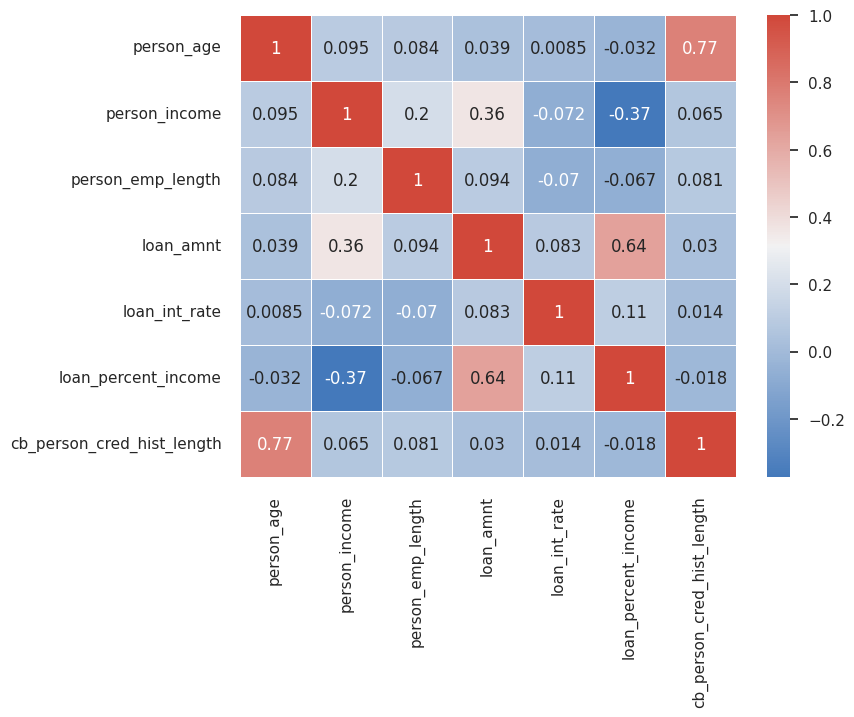

In [ ]:
numeric_feature = df.select_dtypes(include = np.number).columns

data_to_plot_correlation = df[numeric_feature]
correlation_matrix = data_to_plot_correlation.corr()

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True)

plt.figure(figsize = (8,6))
plt.rcParams.update({'font.size': 12})
ax = sns.heatmap(correlation_matrix,
                 #mask = mask,
                 annot = True,
                 cmap = cmap,
                 linewidth = 0.5)
plt.show()

### Visualisation

In [ ]:
# Count number of person in each class
df["loan_status"].value_counts()

,count
loan_status,
0,18193
1,4572


In [ ]:
# Sampling data for visulisation
sample = df.groupby("loan_status").sample(n = 4000,
                                         random_state = 1)
sample["loan_status"].value_counts()

,count
loan_status,
0,4000
1,4000


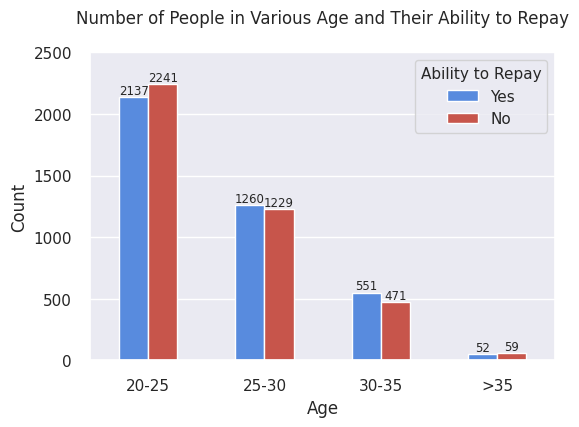

In [ ]:
plt.figure(figsize = (6,4))
sns.set_theme()

# Create a new column for grouping
group = sample[["person_age", "loan_status"]]
column_to_group = "person_age"
class_column = "loan_status"

group.loc[(group[column_to_group] >= 20) & ((group[column_to_group] <= 25)), "group"] = "20-25"
group.loc[(group[column_to_group] > 25) & ((group[column_to_group] <= 30)), "group"] = "25-30"
group.loc[(group[column_to_group] > 30) & ((group[column_to_group] <= 35)), "group"] = "30-35"
group.loc[group[column_to_group] > 35, "group"] = ">35"

ax = sns.countplot(data = group,
                   x = "group",
                   hue = class_column,
                   width = 0.5,
                   palette= ["#4285f4", "#DB4437"],
                   order = ["20-25", "25-30", "30-35", ">35"]
                   )

plt.title("Number of People in Various Age and Their Ability to Repay\n",
          fontsize = 12
          #fontweight = "bold"
          )

plt.xlabel("Age")
plt.ylabel("Count")

plt.legend(title = "Ability to Repay",
           loc = "best",
           labels = ["Yes", "No"],
           frameon = True,
           title_fontsize = 11,
          )

ax.set(ylim = (0, 2500))

# Showing value at the top of each bar
for container in ax.containers:
    ax.bar_label(container,
                 fontsize = 8.5,
                 #fontweight = "bold"
                 )

plt.show()

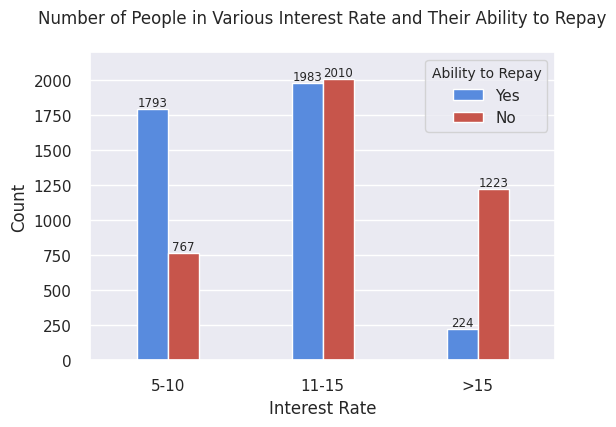

In [ ]:
plt.figure(figsize = (6,4))
sns.set_theme()

# Create new column for grouping interest rate
group = sample[["loan_int_rate", "loan_status"]]
column_to_group = "loan_int_rate"
class_column = "loan_status"

group.loc[(group[column_to_group] >= 5) & ((group[column_to_group] <= 10)), "group"] = "5-10"
group.loc[(group[column_to_group] > 10) & ((group[column_to_group] <= 15)), "group"] = "11-15"
group.loc[group[column_to_group] > 15, "group"] = ">15"

ax = sns.countplot(data = group,
                   x = "group",
                   hue = class_column,
                   width = 0.4,
                   palette = ["#4285f4", "#DB4437"],
                   order = ["5-10", "11-15", ">15"]
                   )

plt.title("Number of People in Various Interest Rate and Their Ability to Repay\n",
          fontsize = 12)

plt.xlabel("Interest Rate")
plt.ylabel("Count")

plt.legend(title = "Ability to Repay",
           loc = "best",
           labels = ["Yes", "No"],
           frameon = True,
           title_fontsize = 10
          )

ax.set(ylim = (0, 2200))

# Showing value at the top of each bar
for container in ax.containers:
    ax.bar_label(container,
                 fontsize = 8.5,
                 #fontweight = "bold"
                 )

plt.show()

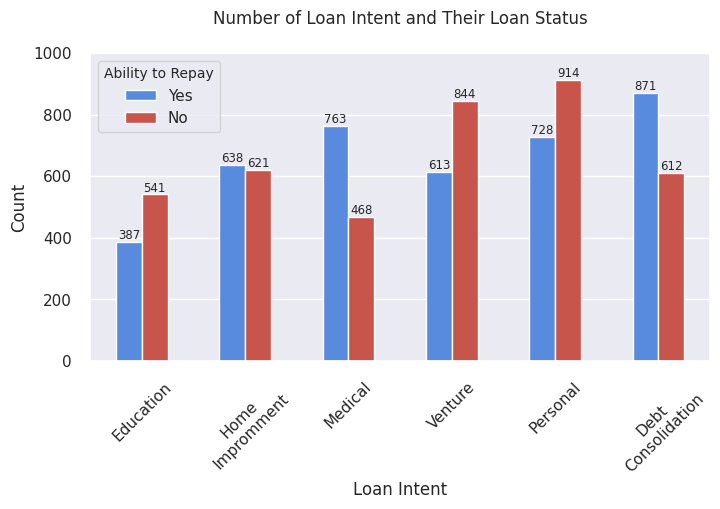

In [ ]:
plt.figure(figsize = (8,4))

ax = sns.countplot(data = sample,
                   x = "loan_intent",
                   hue = "loan_status",
                   palette= ["#4285f4", "#DB4437"],
                   width = 0.5
                  )

plt.title("Number of Loan Intent and Their Loan Status\n",
          fontsize = 12)
plt.xlabel("Loan Intent")
plt.ylabel("Count")

plt.legend(title = "Ability to Repay",
           loc = "best",
           labels = ["Yes", "No"],
           frameon = True,
           title_fontsize = 10,
           #bbox_to_anchor = (1.15, 0.5)
          )

ax.set(ylim = (0, 1000))
ax.tick_params(axis = "x", rotation = 45)
ax.set_xticklabels(["Education","Home\nImpromment","Medical","Venture","Personal","Debt\nConsolidation"])

# Showing value at the top of each bar
for container in ax.containers:
    ax.bar_label(container,
                 fontsize = 8.5,
                 #fontweight = "bold"
                 )

plt.show()

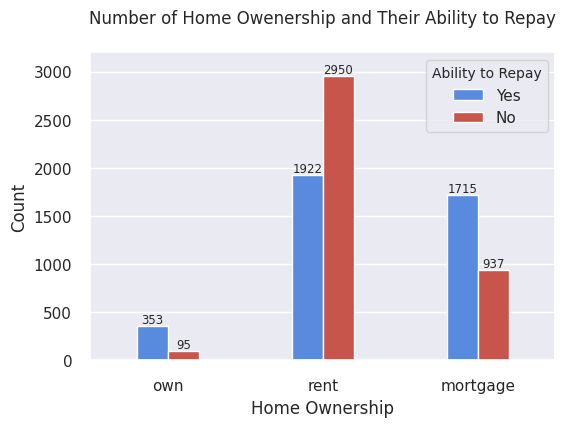

In [ ]:
plt.figure(figsize = (6,4))

ax = sns.countplot(data = sample[sample["person_home_ownership"] != "other"],
                   x = "person_home_ownership",
                   hue = "loan_status",
                   palette= ["#4285f4", "#DB4437"],
                   order = ["own", "rent", "mortgage"],
                   width = 0.4
                   )

plt.title("Number of Home Owenership and Their Ability to Repay\n",
          fontsize = 12)

plt.xlabel("Home Ownership")
plt.ylabel("Count")

plt.legend(title = "Ability to Repay",
           loc = "best",
           labels = ["Yes", "No"],
           frameon = True,
           title_fontsize = 10
          )

ax.set(ylim = (0, 3200))

# Showing value at the top of each bar
for container in ax.containers:
    ax.bar_label(container,
                 fontsize = 8.5,
                 #fontweight = "bold"
                 )

plt.show()

## Data Preprocessing for ML

In [ ]:
# Dealing with an imbalance class

# Count the number of observations in each class
display(df["loan_status"].value_counts())
class_count_0, class_count_1 = df["loan_status"].value_counts()

# Seperate class
class_0 = df[df["loan_status"] == 0]
class_1 = df[df["loan_status"] == 1]

print("\n----------\n")
print("Before doing under sampling:", df.shape)
print("Class 0:", df[df["loan_status"] == 0].shape)
print("Class 1:", df[df["loan_status"] == 1].shape)

# Sample data
class_0_under = class_0.sample(class_count_1)
df = pd.concat([class_0_under, class_1], axis = 0)

print("\n----------\n")
print("After doing under sampling:", df.shape)
print("Class 0:", df[df["loan_status"] == 0].shape)
print("Class 1:", df[df["loan_status"] == 1].shape)

,count
loan_status,
0,18193
1,4572



----------

Before doing under sampling: (22765, 12)
Class 0: (18193, 12)
Class 1: (4572, 12)

----------

After doing under sampling: (9144, 12)
Class 0: (4572, 12)
Class 1: (4572, 12)


## Creating ML model

### Training multiple ML models

In [ ]:
categorical_features = ["person_home_ownership", "loan_intent", "cb_person_default_on_file"]
ordinal_features = {"loan_grade": ["A", "B", "C", "D", "E", "F", "G"] } # A (Lowest risk) -> G (Highest risk)

classifier = setup(df,
                   target = "loan_status",
                   train_size = 0.7,

                   categorical_features = categorical_features,
                   max_encoding_ohe = 25,
                   encoding_method = "max_encoding_ohe",

                   ordinal_features = ordinal_features,

                   numeric_imputation = "median",
                   categorical_imputation = "mode",

                   remove_multicollinearity = True,
                   feature_selection = False,
                   normalize = True,
                   normalize_method = "zscore")

,Description,Value
0,Session id,920
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(9144, 12)"
4,Transformed data shape,"(9144, 19)"
5,Transformed train set shape,"(6400, 19)"
6,Transformed test set shape,"(2744, 19)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,3


In [ ]:
preprocess_data = get_config("train_transformed")
preprocess_data

,person_age,person_income,person_home_ownership_rent,person_home_ownership_mortgage,person_home_ownership_own,person_home_ownership_other,person_emp_length,loan_intent_medical,loan_intent_homeimprovement,loan_intent_education,loan_intent_debtconsolidation,loan_intent_venture,loan_intent_personal,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
28389,0.258944,-0.500208,0.792257,-0.695125,-0.243417,-0.062622,-0.924739,1.960820,-0.357704,-0.478659,-0.45907,-0.422398,-0.449811,0.371140,-0.275078,-0.007258,-0.539299,0.496543,0
23968,1.557318,0.588293,-1.262217,1.438591,-0.243417,-0.062622,-0.924739,1.960820,-0.357704,-0.478659,-0.45907,-0.422398,-0.449811,-0.408157,-0.495878,-0.900554,-0.539299,0.882207,0
29497,3.375040,-1.122209,0.792257,-0.695125,-0.243417,-0.062622,-1.223826,1.960820,-0.357704,-0.478659,-0.45907,-0.422398,-0.449811,-0.408157,-1.318859,-0.999809,-0.539299,2.424864,0
15127,-1.039429,-1.355460,0.792257,-0.695125,-0.243417,-0.062622,-1.223826,-0.509991,2.795609,-0.478659,-0.45907,-0.422398,-0.449811,1.929734,-1.419222,-0.999809,-0.539299,-1.046114,1
14710,-0.260405,1.832295,-1.262217,1.438591,-0.243417,-0.062622,-0.027479,-0.509991,-0.357704,2.089169,-0.45907,-0.422398,-0.449811,-0.408157,0.086231,-0.900554,-0.539299,-0.660450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27698,0.778294,0.821543,0.792257,-0.695125,-0.243417,-0.062622,-0.326565,-0.509991,2.795609,-0.478659,-0.45907,-0.422398,-0.449811,0.371140,1.491321,0.389763,1.854260,0.110878,1
26972,0.518619,1.513519,-1.262217,1.438591,-0.243417,-0.062622,0.570695,1.960820,-0.357704,-0.478659,-0.45907,-0.422398,-0.449811,1.150437,0.286958,-0.900554,1.854260,1.267871,1
7459,-0.260405,-0.422458,0.792257,-0.695125,-0.243417,-0.062622,-0.625652,1.960820,-0.357704,-0.478659,-0.45907,-0.422398,-0.449811,1.150437,-0.365405,-0.205768,-0.539299,-1.046114,1
11054,-0.260405,0.724356,-1.262217,1.438591,-0.243417,-0.062622,-0.625652,-0.509991,-0.357704,2.089169,-0.45907,-0.422398,-0.449811,-0.408157,0.136413,-0.503534,-0.539299,-0.274786,0


In [ ]:
top5_model = compare_models(sort = "Accuracy",
                            cross_validation = False,
                            #fold = 10, # Using cross-validation for training
                            n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8520,0.9326,0.7821,0.9093,0.8409,0.7041,0.7111,0.3000
xgboost,Extreme Gradient Boosting,0.8444,0.9262,0.7981,0.8795,0.8368,0.6888,0.6917,0.5600
gbc,Gradient Boosting Classifier,0.8397,0.9190,0.7668,0.8976,0.8270,0.6793,0.6866,1.1100
rf,Random Forest Classifier,0.8316,0.9095,0.7653,0.8824,0.8197,0.6633,0.6692,0.8600
et,Extra Trees Classifier,0.8149,0.8944,0.7609,0.8529,0.8043,0.6297,0.6334,1.2500
ada,Ada Boost Classifier,0.8083,0.8837,0.7507,0.8484,0.7966,0.6166,0.6207,0.4700
dt,Decision Tree Classifier,0.7762,0.7762,0.7915,0.7680,0.7796,0.5525,0.5527,0.1700
knn,K Neighbors Classifier,0.7751,0.8450,0.7376,0.7975,0.7664,0.5503,0.5518,0.1700
lr,Logistic Regression,0.7704,0.8521,0.7493,0.7823,0.7655,0.5408,0.5413,0.1400
ridge,Ridge Classifier,0.7690,0.7690,0.7391,0.7860,0.7618,0.5379,0.5389,0.1300


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
top5_model[0]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=920, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

### Evaluation

In [ ]:
model = create_model("lightgbm",
                     cross_validation = False
                     #fold = 10 # # If using cross-validation for training
                     )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.8520,0.9326,0.7821,0.9093,0.8409,0.7041,0.7111


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

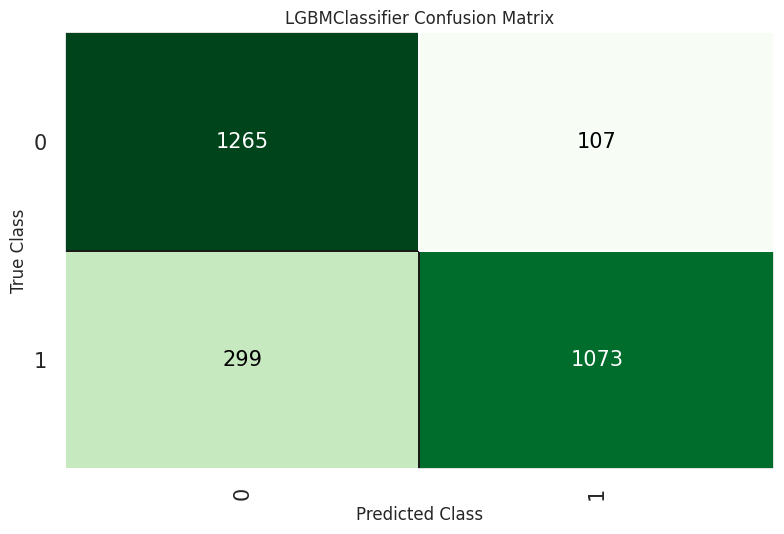

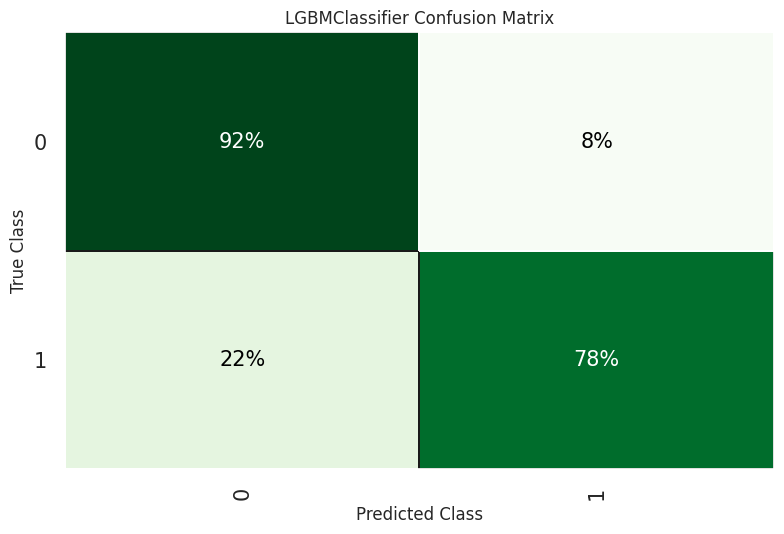

In [ ]:
# Plot a confusion matrix of number of observtions
ax = plot_model(model,
                plot = "confusion_matrix",
                scale = 1 # Figure size
                )

# Plot a confusion matrix of percentage
ax = plot_model(model,
                plot = "confusion_matrix",
                scale = 1, # Figure size
                plot_kwargs = {"percent" : True})

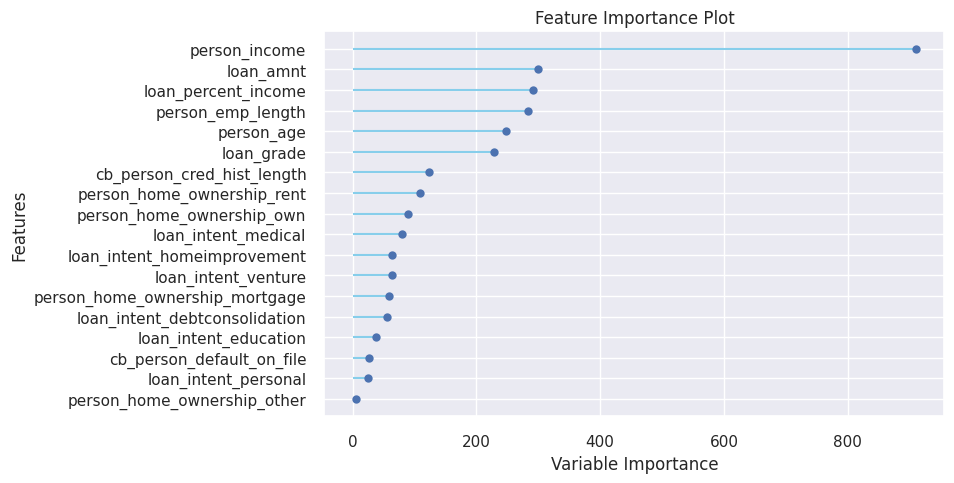

In [ ]:
plot_model(model, plot = "feature_all")

In [ ]:
tuned_model = tune_model(top5_model[0],
                         optimize = "Accuracy",
                         n_iter = 30, # Number of set of hyperparameters
                         choose_better = True,
                         fold = 10 # Available for cross-validation only
                         )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8469,0.9262,0.8094,0.8750,0.8409,0.6938,0.6957
1,0.8406,0.9251,0.7875,0.8811,0.8317,0.6812,0.6851
2,0.8672,0.9456,0.8531,0.8778,0.8653,0.7344,0.7347
3,0.8406,0.9193,0.8031,0.8682,0.8344,0.6812,0.6832
4,0.8531,0.9369,0.8031,0.8924,0.8454,0.7062,0.7098
5,0.8734,0.9408,0.8281,0.9107,0.8674,0.7469,0.7500
6,0.8578,0.9405,0.8125,0.8935,0.8511,0.7156,0.7186
7,0.8625,0.9387,0.8312,0.8867,0.8581,0.7250,0.7264
8,0.8375,0.9269,0.7844,0.8776,0.8284,0.6750,0.6788


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 30 candidates, totalling 300 fits


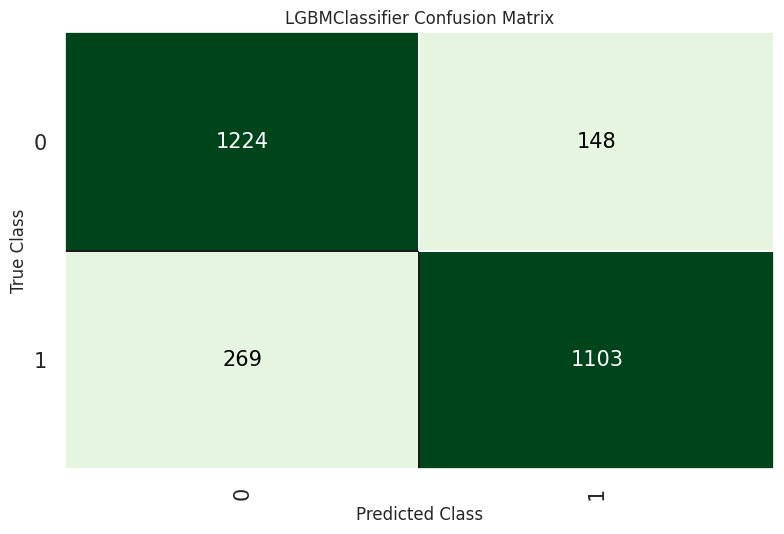

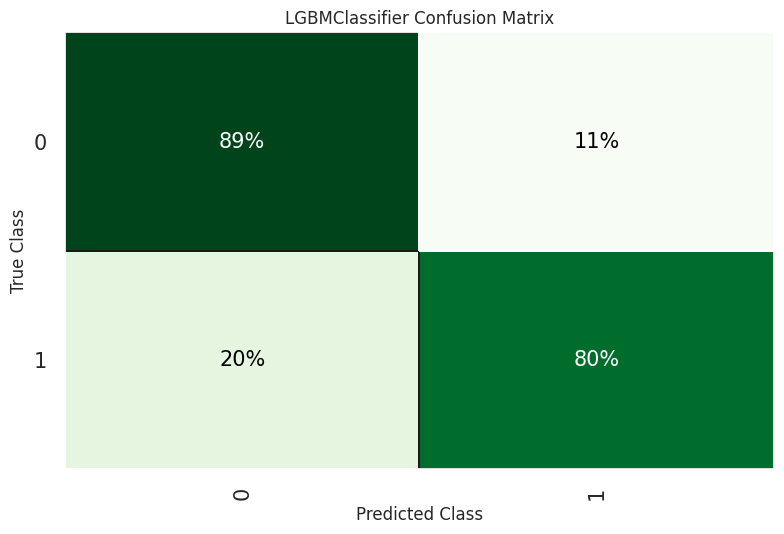

In [ ]:
# Plot a confusion matrix of number of observtions
ax = plot_model(tuned_model,
                plot = "confusion_matrix",
                scale = 1 # Figure size
                )

# Plot a confusion matrix of percentage
ax = plot_model(tuned_model,
                plot = "confusion_matrix",
                scale = 1, # Figure size
                plot_kwargs = {"percent" : True})

In [ ]:
# Printing hyperparameter of models

# Default model
print("Default model:\n\n", model)
print("\n----------\n")

# Tuned model
print("Tuned model:\n\n", tuned_model)

Default model:

 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=920, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

----------

Tuned model:

 LGBMClassifier(bagging_fraction=0.9, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=61, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=210, n_jobs=-1, num_leaves=30, objective=None,
               random_state=920, reg_alpha=0.1, reg_lambda=0.15, subsample=1.0,
               subsample_for_bin=200000, subsamp

In [ ]:
final_model = finalize_model(tuned_model)

In [ ]:
predictions = predict_model(final_model)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8976,0.9632,0.8462,0.9431,0.8920,0.7952,0.7994


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,prediction_label,prediction_score
3598,26,75000,rent,0.0,homeimprovement,A,3600,8.940000,0.05,N,4,0,0,0.9280
23769,30,59000,mortgage,4.0,medical,A,10000,8.000000,0.17,N,9,1,0,0.6829
14745,24,113676,mortgage,8.0,education,A,7200,6.990000,0.06,N,2,0,0,0.9726
22108,33,30000,rent,0.0,personal,A,6500,8.490000,0.22,N,5,0,0,0.7701
778,24,78996,rent,2.0,homeimprovement,D,20000,14.110000,0.25,N,2,1,1,0.9586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20571,32,76500,rent,12.0,medical,D,10000,13.240000,0.11,Y,9,1,1,0.9817
982,24,43400,rent,2.0,debtconsolidation,E,18000,16.629999,0.41,Y,2,1,1,0.9989
2859,23,57000,rent,6.0,homeimprovement,D,3000,14.590000,0.05,N,2,1,1,0.9629
12918,23,73500,rent,1.0,venture,C,12000,12.990000,0.16,N,2,1,0,0.6891


In [ ]:
predictions

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,prediction_label,prediction_score
3598,26,75000,rent,0.0,homeimprovement,A,3600,8.940000,0.05,N,4,0,0,0.9280
23769,30,59000,mortgage,4.0,medical,A,10000,8.000000,0.17,N,9,1,0,0.6829
14745,24,113676,mortgage,8.0,education,A,7200,6.990000,0.06,N,2,0,0,0.9726
22108,33,30000,rent,0.0,personal,A,6500,8.490000,0.22,N,5,0,0,0.7701
778,24,78996,rent,2.0,homeimprovement,D,20000,14.110000,0.25,N,2,1,1,0.9586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20571,32,76500,rent,12.0,medical,D,10000,13.240000,0.11,Y,9,1,1,0.9817
982,24,43400,rent,2.0,debtconsolidation,E,18000,16.629999,0.41,Y,2,1,1,0.9989
2859,23,57000,rent,6.0,homeimprovement,D,3000,14.590000,0.05,N,2,1,1,0.9629
12918,23,73500,rent,1.0,venture,C,12000,12.990000,0.16,N,2,1,0,0.6891


In [ ]:
# Saving pickle file
save_model(tuned_model, "saved_credit_risk_prediction")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['person_age', 'person_income',
                                              'person_emp_length', 'loan_amnt',
                                              'loan_int_rate',
                                              'loan_percent_income',
                                              'cb_person_cred_hist_length'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=n...
                                 boosting_type='gbdt', class_weight=None,
                   